In [2]:
configFile = "config.toml"
include("src/ladderDGA_Julia.jl")

Reading Inputs...Reading Fortran Input, this can take several minutes.
Done Reading Gamma
Done Reading chi
loading from vars.jld
TODO: check beta consistency, config <-> g0man, chi_dir <-> gamma dir
(81, 82, 82)(81, 82, 82)(81,)(81, 82, 82)
Inputs Read. Starting Computation.
    Found usable intervals for local susceptibility of length 
          sp: 13
          ch: 11 
          œáLoc_sp = 0.3836, œáLoc_ch = 0.0203
Setting up and calculating k Grid: 
Calculating bubble: 
in bubble: (81,)
gnuomega indices: 122
in bubble: ModelParameters(2.0, 1.0, 15.0, 1.0, 3)
in bubble: SimulationParameters(41, 40, 0, 10, false, false, false, false, "FFT")
  2.983337 seconds (5.80 M allocations: 439.554 MiB, 4.43% gc time)
Calculating œá and Œ≥: 
 57.872018 seconds (7.57 M allocations: 1.056 GiB, 0.37% gc time)
Found usable intervals for non-local susceptibility of length 
          sp: 35:47, length: 13
          ch: 36:46, length: 11
          usable: 36:46, length: 11
Using rhs for non tail correc

In [8]:
function construct_f2(Œªsp, Œªch, œásp, œách, qMultiplicity; rhs=0.5)
   œách_Œª = œá_Œª(œách, Œªch)
   œásp_Œª = œá_Œª(œásp, Œªsp)
   tmp =  sum(sum(œách_Œª .+ œásp_Œª, dims=1)[1,:] .* qMultiplicity) ./ (modelParams.Œ≤*sum(qMultiplicity))           
   res1 = real(tmp - rhs)
   Œ£_Œª = Interval.(calc_DŒìA_Œ£_fft(œásp_Œª, œách_Œª, trilexsp, trilexch, bubble, Œ£_loc, FUpDo, 
                                  œµkGrid, qIndices, usable_œâ, modelParams, simParams))
   tmp = mapslices(x -> 1 ./ G0[1:size(Œ£_Œª,2)].- x, Œ£_Œª; dims=[2])
   res2 += sum(œách_Œª .- œásp_Œª) ./ (2*modelParams.Œ≤) .- sum(Œ£_Œª ./ (tmp))
   return res1


œá_Œª(œá, Œª) = map(œái -> 1.0 / ((1.0 / œái) + Œª), œá)
œá_Œª!(œá_Œª, œá, Œª) = (œá_Œª = map(œái -> 1.0 / ((1.0 / œái) + Œª), œá))


function construct_f(Œªsp, Œªch, œásp, œách, qMultiplicity; rhs=0.5) 
   œách_Œª = œá_Œª(œách, Œªch)
   œásp_Œª = œá_Œª(œásp, Œªsp)
   tmp =  sum(sum(œách_Œª .+ œásp_Œª, dims=1)[1,:] .* qMultiplicity) ./ (modelParams.Œ≤*sum(qMultiplicity))           
   res1 = real(tmp - rhs)
   return res1
end
   #Œ£_Œª = calc_DŒìA_Œ£_fft(œásp_Œª, œách_Œª, trilexsp, trilexch, bubble, Œ£_loc, FUpDo, 
   #                               œµkGrid, qIndices, usable_œâ, modelParams, simParams)
#(1-modelParams.n/2)*(modelParams.n/2)
   #tmp = mapslices(x -> 1 ./ G0[1:size(Œ£_Œª,2)].- x, Œ£_Œª; dims=[2])
   #res2 = real(sum(œách_Œª .- œásp_Œª) ./ (2*modelParams.Œ≤) .- sum(Œ£_Œª ./ (tmp)))
   #Kriterien: œásp/ch(œâ=0) > 0, TODO: checken
   #U>0 => œách, œásp >= 0 UND œách soll kleiner, œásp groesser werden
   #U<0 => Œªsp < 0, Œªch > 0
kIndices, kGrid = gen_kGrid(simParams.Nk, modelParams.D) 
œµkGrid          = squareLattice_ekGrid(kGrid)
qIndices, qGrid = reduce_kGrid.(cut_mirror.((kIndices, kGrid)))
qMultiplicity   = kGrid_multiplicity(qIndices);

In [163]:
calc_DŒìA_Œ£_fft(0.0, 0.0, trilexsp, trilexch, bubble, Œ£_loc, FUpDo, 
                                  œµkGrid, qIndices, usable_œâ, modelParams, simParams)

36:46
TODO: qMult instead of expansion


MethodError: MethodError: no method matching getindex(::Float64, ::Int64, ::Colon)
Closest candidates are:
  getindex(::Number, ::Integer) at number.jl:77
  getindex(::Number, !Matched::Integer...) at number.jl:82
  getindex(::Number) at number.jl:75
  ...

In [169]:
œásp_Œª_in = zeros(size(œách)...)
œásp_Œª_in[usable_sp,:] = œásp_Œª
@time Œ£_ladder = calc_DŒìA_Œ£_fft(œásp_Œª_in, œách, trilexsp, trilexch, bubble, Œ£_loc, FUpDo, 
                                  œµkGrid, qIndices, usable_œâ, modelParams, simParams);
size(Œ£_ladder)


36:46
TODO: qMult instead of expansion
  0.331813 seconds (1.65 M allocations: 249.389 MiB, 18.93% gc time)


(41, 56)

In [181]:
Œ£_ladder[:,end]

41-element Array{Complex{Float64},1}:
    0.5677455260530243 - 1.4381707940360484im
    0.3813986108916737 - 1.081894829198292im
    0.2557734823226938 - 0.8338618857810337im
    0.1824450219853537 - 0.6988793564987481im
   0.13563915374924623 - 0.6272532838285463im
   0.10384878499928642 - 0.4783573550198025im
   0.08155276658549437 - 0.4303549000145049im
   0.06560205227282742 - 0.39351439289026535im
  0.053829051805098255 - 0.36154457103528964im
   0.04490991499258688 - 0.33359097411096733im
   0.03800206285174954 - 0.3091215358321686im
    0.0325500906363537 - 0.28764549061967454im
  0.028176398376069913 - 0.2687235659836393im
                       ‚ãÆ
  0.005805200175864168 - 0.12409481545376101im
  0.005446948038306139 - 0.1202320538778975im
  0.005120747471689687 - 0.11660042212865357im
  0.004822898195866976 - 0.11318002479157034im
 0.0045502174113900016 - 0.10995318437455018im
 0.0042999557653375575 - 0.10690414322052531im
  0.004069727754082934 - 0.1040188037552496im
  0.003

In [134]:
Xsp = @interval(0,2)
Xch = @interval(-20, 20)
Œªch_range = -30:0.1:0
res = zeros(size(Œªch_range))
res2 = zeros(size(Œªch_range))
rœá_sp = real.(œásp[usable_œâ,:])
rœá_ch = real.(œách[usable_œâ,:])
for (Œªi,Œªch) in enumerate(Œªch_range)
    testf(Œªsp) = construct_f(Œªsp, Œªch, rœá_sp, rœá_ch, qMultiplicity, rhs=real(œáLocsp + œáLocch))
    res_internal = roots(testf, Xsp, Newton, 1e-12)
    max_int = maximum(interval.(res_internal))
    min_int = minimum(interval.(res_internal))
    res[Œªi] = mid(max_int)
    res2[Œªi] = mid(min_int)
    print("\r", Œªi, " of ", length(Œªch_range))
end

301 of 301

In [153]:
using Plots
plot(Œªch_range[1:end], res[1:end], xlabel="Œªch", ylabel="max(Œªsp)", xticks = Œªch_range[1:25:end])
#savefig("max_lambdasp_of_lambdach.pdf")

In [154]:
plot(Œªch_range[1:end], res2[1:end], xlabel="Œªch", ylabel="min(Œªsp)", xticks = Œªch_range[1:25:end])
#savefig("min_lambdasp_of_lambdach.pdf")

In [132]:
res[end]

0.09444782643893668

In [133]:
nh       = ceil(Int64, size(usable_œâ,1)/2)
œásp_min    = -minimum(real.(1 ./ œásp[usable_œâ[nh],:]))
œách_min    = -minimum(real.(1 ./ œách[usable_œâ[nh],:]))
println("œásp_min: $(œásp_min)\nœách_min: $(œách_min)")

œásp_min: 0.09308725343569026
œách_min: -14.473154939042681


In [149]:
Xsp = @interval(-2,2)
Xch = @interval(-20,0)
Œªsp_range = -1:0.02:1
resi = zeros(size(Œªsp_range))
resi2 = zeros(size(Œªsp_range))
rœá_sp = real.(œásp[usable_œâ,:])
rœá_ch = real.(œách[usable_œâ,:])
for (Œªi,Œªsp) in enumerate(Œªsp_range)
    testf(Œªch) = construct_f(Œªsp, Œªch, rœá_sp, rœá_ch, qMultiplicity, rhs=real(œáLocsp + œáLocch))
    res_internal = roots(testf, Xch, Newton, 1e-8)
    max_int = maximum(interval.(res_internal))
    min_int = minimum(interval.(res_internal))
    resi[Œªi] = mid(max_int)
    resi2[Œªi] = mid(min_int)
    print("\r", Œªi, " of ", length(Œªsp_range))
end

101 of 101

In [155]:
plot(Œªsp_range[1:end], resi[1:end], xlabel="Œªsp", ylabel="max(Œªch)")
#savefig("max_lambdach_of_lambdasp.pdf")

In [156]:
plot(Œªsp_range[1:end], resi2[1:end], xlabel="Œªsp", ylabel="min(Œªch)")
#savefig("min_lambdach_of_lambdasp.pdf")

In [81]:
res2 = interval.(res)
res3 = mid.(res2)
res4 = map(x -> [x[1], x[2]], res3)
res5 = collect(transpose(hcat(res4...)));

In [82]:
size(res5)

(13658, 2)

In [78]:
sort(res5, dims=1)

13658√ó2 Array{Float64,2}:
 0.000369757  -14.9995
 0.000369757  -14.9995
 0.000369757  -14.9995
 0.000369757  -14.9995
 0.000369757  -14.9995
 0.000369757  -14.9995
 0.000369757  -14.9995
 0.000369757  -14.9995
 0.000369757  -14.9995
 0.000369757  -14.9995
 0.000369757  -14.9986
 0.000369757  -14.9986
 0.000369757  -14.9986
 ‚ãÆ            
 0.0995875    -14.0008
 0.0995875    -14.0008
 0.0995875    -14.0003
 0.0995875    -14.0003
 0.0995875    -14.0003
 0.0995875    -14.0003
 0.0995875    -14.0003
 0.0995875    -14.0003
 0.0995875    -14.0003
 0.0995875    -14.0003
 0.0995875    -14.0003
 0.0995875    -14.0003

In [216]:
Œªch_range2 = -0.6:0.01:0.6
Œªsp_range2 = -0.5:0.01:0.5
res2 = zeros(length(Œªch_range2), length(Œªsp_range2))
œârange = intersect(usable_ch, usable_sp)

for (i,Œªch_i) in enumerate(Œªch_range2)
    for (j,Œªsp_i) in enumerate(Œªsp_range2)
        res2[i,j] = construct_f( (Œªch_i, Œªsp_i),œách[œârange,:], œásp[œârange,:])  
    end
end

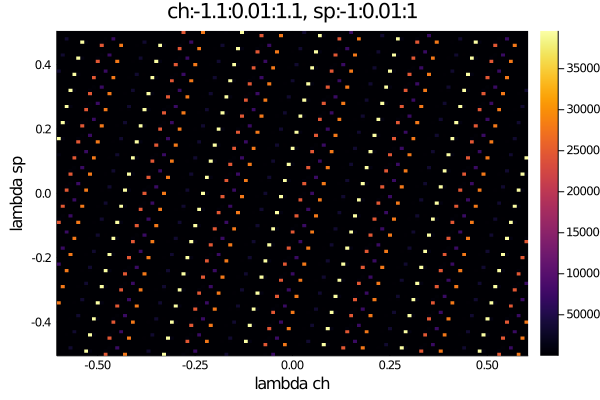

In [217]:
heatmap(Œªch_range2, Œªsp_range2, (res2 .- 0).^4, xlabel = "lambda ch", ylabel = "lambda sp", title="ch:-1.1:0.01:1.1, sp:-1:0.01:1")

In [349]:
œá_min_ch    = -minimum(1 ./ real.(œách[ceil(Int64,size(œách,1)/2),:]))
œá_min_sp    = -minimum(1 ./ real.(œásp[ceil(Int64,size(œách,1)/2),:]))
println(œá_min_ch, ", ", œá_min_sp)

-14.473154939042681, 0.09308725343569026


In [375]:
Xint = 0..1.1
fsp(Œªsp) =  construct_f(0.0, Œªsp, œách[œârange,:], œásp[œârange,:], qMultiplicity, rhs = rhs)
res_sp = IntervalRootFinding.roots(fsp, Xint, Newton, 1e-5)  
println(sort(interval.(res_sp)))
println(maximum(interval.(res_sp)))

Interval{Float64}[[0.0103389, 0.010339], [0.0143941, 0.0144021], [0.0225144, 0.0225147], [0.0236029, 0.023608], [0.0289026, 0.0289106], [0.0387014, 0.0387016], [0.049588, 0.0495966], [0.0626939, 0.062694], [0.0709535, 0.0709617], [0.0833816, 0.0833819], [0.0930821, 0.0930906], [0.0952014, 0.0952076]]
[0.0952014, 0.0952076]


In [377]:
Xint = (œá_min_ch-0.5)..(œá_min_ch+0.5)
œá_min_ch = -minimum(1 ./ real.(œách[floor(Int64,size(œách,1)/2),:]))
fch(Œªch) =  construct_f(Œªch, 0.0, œách[œârange,:], œásp[œârange,:], qMultiplicity, rhs = rhs)
res_ch = IntervalRootFinding.roots(fch, Xint)  
println(sort(interval.(res_ch)))
println(maximum(interval.(res_ch)))

Interval{Float64}[[227.512, 227.513], [227.514, 227.515]]
[227.514, 227.515]


In [333]:
Xint = -2..2
Œªch_range = -15:0.1:-14
œá_min_ch    = -minimum(1 ./ real.(œách[floor(Int64,size(œách,1)/2),:]))
res = zeros(length(Œªch_range))
for (i,Œªch_i) in enumerate(-15:0.1:-14)
    fsp_int(Œªsp) =  construct_f(Œªch_i, Œªsp, œách[œârange,:], œásp[œârange,:], qMultiplicity, rhs = rhs)
    res_sp = IntervalRootFinding.roots(fsp_int, Xint, Newton, 1e-3)
    res_sp_sort = sort(interval.(res_sp))
    println(res_sp_sort)
    res[i] = mid(maximum(interval.(res_sp)))
    println(i)
end

Interval{Float64}[[-0.656976, -0.65666], [-0.645462, -0.644907], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.351862, -0.350869], [-0.348871, -0.347909], [-0.34791, -0.347508], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.30

Interval{Float64}[[-0.617177, -0.617105], [-0.614462, -0.614187], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.348871, -0.347909], [-0.34791, -0.347435], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.305545, -0.304552], [-0.3

Interval{Float64}[[-0.615255, -0.614461], [-0.6068, -0.606756], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.348871, -0.347909], [-0.347414, -0.346933], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.305545, -0.304552], [-0.30

Interval{Float64}[[-0.668343, -0.667733], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.351862, -0.350869], [-0.348871, -0.347909], [-0.34791, -0.347527], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.305545, -0.304552], [-0.3

Interval{Float64}[[-0.709881, -0.709333], [-0.707951, -0.707624], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.351862, -0.350869], [-0.348871, -0.347909], [-0.34791, -0.347586], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.3

Interval{Float64}[[-0.738249, -0.738186], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400529, -0.400028], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.351862, -0.350869], [-0.348871, -0.347909], [-0.34791, -0.347621], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.3

In [334]:
res

11-element Array{Float64,1}:
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237

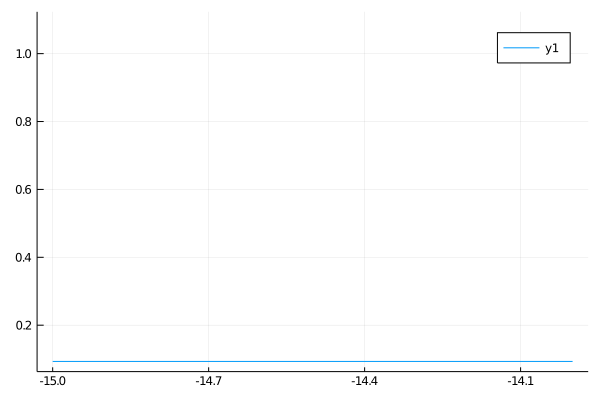

In [335]:
plot(Œªch_range, res)

In [310]:
Xint = -20..20
function f_full( (Œªch, Œªsp) ) 
    r = construct_f(Œªch, Œªsp, œách[œârange,:], œásp[œârange,:], qMultiplicity, rhs = rhs)
    return SVector(r,r)
end

function test( (Œªch, Œªsp) ) 
    r = Œªch + Œªsp
    return SVector(r,r)
end
    
res = IntervalRootFinding.roots(f_full, Xint √ó Xint, Newton, 1e-1)  
#println(sort(interval.(res)))
#println(maximum(interval.(res)))

InterruptException: InterruptException:

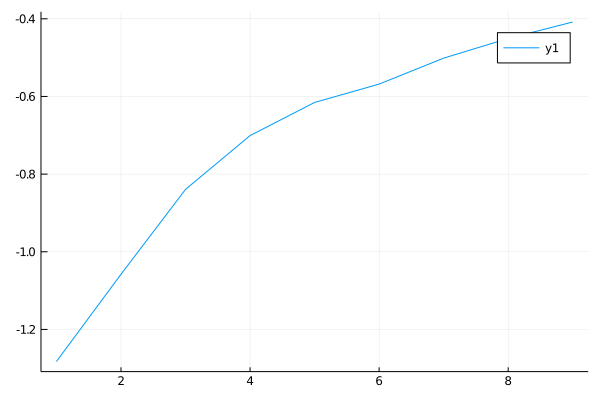

In [62]:
plot(imag.(Œ£_ladder[1:9,35]))

In [11]:
œásp[41,:]

56-element Array{Complex{Float64},1}:
  2.3349399499041796 + 9.411477191714448e-25im
   2.409315394519308 + 5.293955920339377e-25im
    2.48974530686027 - 1.1176129165160908e-24im
  2.5770684416759417 + 1.764651973446459e-24im
   2.629817712222572 - 1.7058302409982437e-24im
  2.7296494814613683 + 2.5881562277214734e-24im
   2.839307760241222 + 1.7058302409982437e-24im
   3.032864406680289 - 9.411477191714448e-25im
   3.175418149394974 + 5.88217324482153e-24im
   3.624836145788811 - 1.0587911840678754e-24im
   2.968757662903386 + 5.117490722994731e-24im
  3.1026950584946213 + 8.823259867232295e-25im
  3.2524373908394306 + 8.823259867232295e-25im
                     ‚ãÆ
  18.025105479364992 + 2.1286114429697913e-23im
  7.0845317833247465 + 8.823259867232295e-25im
   8.203121219174166 + 7.352716556026913e-24im
   14.16757052558115 + 1.3320181312898354e-22im
    194.547910113105 - 7.812467216842163e-21im
  -20.16362992171506 + 7.717411297205848e-23im
   7.972014245624513 + 2.6763888263937

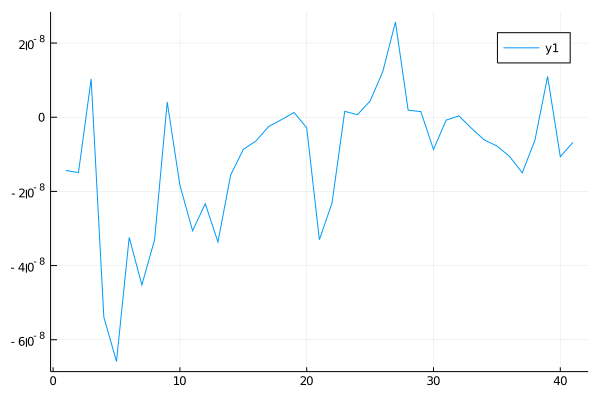

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error


In [50]:
plot(real.(Œ£_ladder[:,35]))

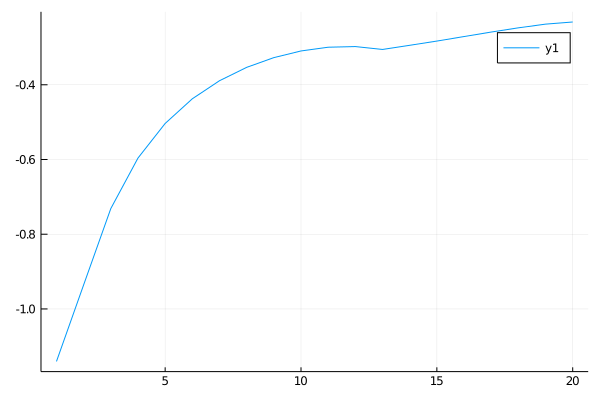

In [55]:
plot(imag.(Œ£_ladder[1:20,35]))

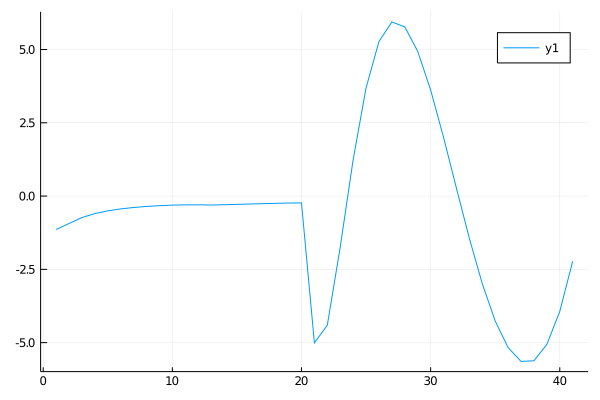

In [56]:
plot(imag.(Œ£_ladder[:,35]))

In [67]:
include("src/ladderDGA_Julia.jl")
include("test/loadFortranData.jl")

loadFortranData (generic function with 1 method)

In [71]:
using FortranFiles
bubble_f, œách_f, œásp_f, trilexch_f, trilexsp_f, Œ£_f = loadFortranData("/home/julian/Hamburg/ladderDGA3D_FFT");

In [82]:
modelParams, simParams, env, Œìch, Œìsp, Œ£_loc, FUpDo, œáLocch, œáLocsp, usable_loc_ch, usable_loc_sp = setup_LDGA("config.toml");
bubble, œách, œásp, œásp_Œª, usable_sp, usable_ch,trilexch, trilexsp, Œ£_ladder= calculate_Œ£_ladder("config.toml");

Reading Fortran Input, this can take several minutes.
Done Reading Gamma
Done Reading chi
loading from vars.jld
TODO: check beta consistency, config <-> g0man, chi_dir <-> gamma dir
Reading Inputs...Reading Fortran Input, this can take several minutes.
Done Reading Gamma
Done Reading chi
loading from vars.jld
TODO: check beta consistency, config <-> g0man, chi_dir <-> gamma dir
(81, 82, 82)(81, 82, 82)(81,)(81, 82, 82)
Inputs Read. Starting Computation.
    Found usable intervals for local susceptibility of length 
          sp: 13
          ch: 11 
          œáLoc_sp = 0.3836, œáLoc_ch = 0.0203
Setting up and calculating k Grid: 
Calculating bubble: 
in bubble: (81,)
gnuomega indices: 122
in bubble: ModelParameters(2.0, 1.0, 15.0, 1.0, 3)
in bubble: SimulationParameters(41, 40, 0, 10, false, false, false, false, "FFT")
  0.701871 seconds (1.46 M allocations: 230.419 MiB, 3.54% gc time)
Calculating œá and Œ≥: 
 71.222047 seconds (1.18 M allocations: 762.011 MiB, 1.05% gc time)
Found us

In [60]:
œâi = 37;
qi = 56;

In [61]:
UnitM = Matrix{eltype(Œìsp)}(I, size(Œìsp[1,:,:])...);
bubble_i = bubble[œâi, qi, :];
bubbleD = Diagonal(bubble_i);
A = bubbleD * Œìsp[œâi,:,:] + UnitM
œá_full_sp = A\bubbleD;
œásp = sum_freq(œá_full_sp, [1,2], false, 15.0, weights=nothing)[1,1]
tmp = sum_freq(œá_full_sp, [2], false, 1.0, weights=nothing)[:,1];
Œ≥res_solve =  tmp ./ (bubble_i * (1.0 + 2.0 * œásp));

In [79]:
println("œá: ", œásp, "\ntmp: ", Œ≥res_solve[end])

œá: 0.05059030127327584 + 1.2967212444480171e-9im
tmp: 1.0006926683271116 - 2.792465928549295e-9im


In [80]:
size(trilexsp)

(82,)

In [81]:
size(trilexsp_f)

(81, 56, 82)

In [85]:
all(trilexsp_f[usable_sp,:,:] .‚âà trilexsp[usable_sp,:,:])

true

In [75]:
trilexsp_f[œâi, qi, end]

1.0006926683271118 - 2.7924659280366734e-9im

In [64]:
œá_tmp = Matrix(Œìsp[œâi, :, :]) + Diagonal(1.0 ./ bubble[œâi, qi, :]);
œá_tmp = inv(œá_tmp)
œásp = sum_freq(œá_tmp, [1,2], false, 15.0, weights=nothing)[1,1]
tmpSum = sum_freq(œá_tmp, [2], false, 1.0, weights=nothing)[:,1]
Œ≥res_inv = tmpSum ./ (bubble[œâi, qi, :]  * (1.0 + 2.0 * œásp));

In [65]:
Œ≥res_inv[1]

1.001502119239691 - 7.383095390439116e-9im